Cameron Taylor

Mathematical Foundations of ML

Homework 1

Problem 2
---------------
In the first lecture we discussed the syllabus, overall goals of the class, and which topics would be covered throughout the semester. We also discussed the importance of linear algebra to machine learning and how it applies to modeling.

In the second lecture we began discussing methods to approximate functions that would allow us to store these representations as a list of numbers. This is important because it allows us to utilize linear algebra approaches to work with these functions and also gives us a simple representation for working with these functions computationally. Specifically we looked at Fourier series and Taylor series which approximate a function using sums of sin/cos and increasing degree polynomials respectivley. We also looked at Lagrange polynomials and splines which solve a similar problem, but instead of approximating a function given the function, they approximate a function that will fit a certain set of points.

Problem 3 
---------------
#### A ####

Let Span{$u_1, ..., u_k$} = X. Since {$u_1, ..., u_k$} is a set of orthonormal vectors they are linearly independent. By definition they also span X which means that they form a basis for X. By the definition of a basis, any vector x in X can be written as $a_{1}u_{1} + ... + a_{k}u_{k}$ for some set of constants {$a_1, ..., a_k$}, which is equivalent to $\sum_{k=1}^{K} a_{k}u_{k}$. 

#### B ####

Assume ${u_1, ..., u_k}$ does not form a basis for T. This would imply that either ${u_1, ..., u_k}$ is not a linearly independent set of vectors and/or this set of vectors does not span T. Since the set is an orthonormal set all of the vectors are orthogonal and therefore also linearly independent. This implies that for ${u_1, ..., u_k}$ to not form a basis for T, ${u_1, ..., u_k}$ must not span T. In order for ${u_1, ..., u_k}$ to not span T there must be at least one more non-zero orthogonal vector in T that can be added to ${u_1, ..., u_k}$ to allow it to span T. However, we are also given that the only vector that is orthogonal to all of ${u_1, ..., u_k}$ is the zero vector. This means that {u_1, ..., u_k} must span T because it contains all . Thus we have reached a contradiction proving that since ${u_1, ..., u_k}$ must span T and ${u_1, ..., u_k}$ is linearly independent, it must also form a basis for T.

Problem 4
---------------

In [4]:
# Part a
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def calculate_bspline(t):
    if (t >= -3/2) and (t <= -1/2):
        return ((t + (3/2))**2)/2
    elif (t > -1/2) and (t <= 1/2):
        return -t**2 + (3/4)
    elif (t > 1/2) and (t <= 3/2):
        return ((t - (3/2))**2)/2
    else:
        return 0

In [6]:
def calculate_y(alpha, point, N):
    sum = 0
    
    for k in range(N):
        sum += alpha[k]*calculate_bspline(point-k)
        
    return sum

In [7]:
def piecepoly2(t, alpha):    
    f_x = []
    
    for point in t:   
        f_x.append(calculate_y(alpha, point, len(alpha)))
        
    plt.plot(t, f_x)
   
    

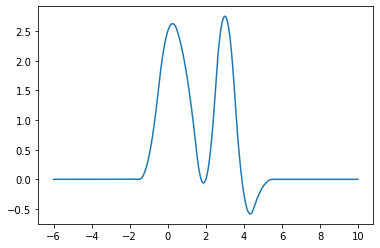

In [8]:
t = np.arange(-6,10,.001)
alpha = [3,2,-1,4,-1]

piecepoly2(t, alpha)

In [9]:
# part b & c
def generate_alphas(N, ts, ys):
    A = np.zeros((N,N))
    
    for i in range(N):
        for k in range(N):
            A[i][k] = calculate_bspline(ts[i]-k)
    
    example_A = A
    
    A = np.linalg.inv(A)

    alpha = [x for x in np.matmul(A, ys)]
    return alpha, example_A

In [10]:
# Print the result
alpha, example_A = generate_alphas(5, [0,1,2,3,4], [1,2,-4,-5,-2])
for i in range(len(alpha)):
    print("a_{} = {}".format(i, alpha[i]))

a_0 = 0.7722943722943723
a_1 = 3.3662337662337665
a_2 = -4.96969696969697
a_3 = -5.548051948051947
a_4 = -1.741991341991342


The above code shows the calculation for the coefficients alpha where len(alpha) = N = 5. The matrix A is generated by taking the value pairs (t, k) for each t in T = {$t_0, ..., t_{N-1}$} of the given points and each k in  K = {$k_0 ... k_{N-1}$}. For value pair (t, k) the result from $b_2$ will be placed in position (i, k) in matrix A, where i is the position of t in the vector T. You then take the inverse of that matrix A and multiply it by both sides of the equation f(x) = A*alpha. This gives $A^{-1}$ * f(x) = alpha. 

The following code produces the b-spline generated with $b_2$ and the alphas generated withe method above, confirming that the curve generated does indeed pass through the given values \[1, 2, -4, -5, 2\]. 

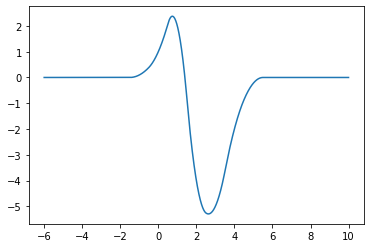

In [11]:
t = np.arange(-6,10,0.001)

piecepoly2(t, alpha)

#### part d ####


Let A = aI + G -> Ax = ax + Gx. We know from the definition of the b-spline function that the function is zero for any (t,k) pair such that |t-k| > 3/2. In terms of the composition of A and therefore also G this means that any position in the matrix $A_{i,j}$ where |i - j| > 3/2 will be zero. The result is that when the diagonal is removed via the decomposition into aI + G, we have two values in each row, except for the first and last which have only 1. 

In [12]:
print(example_A)

[[0.75  0.125 0.    0.    0.   ]
 [0.125 0.75  0.125 0.    0.   ]
 [0.    0.125 0.75  0.125 0.   ]
 [0.    0.    0.125 0.75  0.125]
 [0.    0.    0.    0.125 0.75 ]]


In [13]:
example_G = example_A - (np.trace(example_A)/len(example_A))*np.identity(5)
print(example_G)

[[0.    0.125 0.    0.    0.   ]
 [0.125 0.    0.125 0.    0.   ]
 [0.    0.125 0.    0.125 0.   ]
 [0.    0.    0.125 0.    0.125]
 [0.    0.    0.    0.125 0.   ]]


Based on this, we can further decompose Gx into a($v_1 + v_2$) such that $v_1$ = \[$x_2, x_3, ..., x_N, 0$\] and $v_2$ = \[$0, x_1, ..., x_{N-1}$\]. Now by observing that $||v_1||_2$ and $||v_2||_2$ is < $||x||_2$, we can write 

$||ax + k(v_1 + v_2)x||_2 \geq a||x||_2 - |k|(||v_1||_2 + ||v_2||_2)$

We want $||Ax||_2$ = $||ax + k(v_1 + v_2)x||_2 = 0$ $\geq$ $a||x||_2 - |k|(||v_1||_2 + ||v_2||_2)$ so we replace $v_1 and v_2$ with x since we know both are less than x. 

$0 \geq a||x||_2 - 2|k|(||x||_2)$

From above we can take the values of k and a from the matrix giving us k = 1/8 and a = 3/4. This gives us the following...

$0 \geq (3/4)||x||_2 - (1/4)(||x||_2)$

$0 \geq (1/2)||x||_2$

Since 1/2 is a positive constant x must be the zero vector in order for the inequality to hold. Since x must be the zero vector we have shown that Ax = 0 only when x is the zero vector meaning that A is always invertible. 

#### part e ####

$f(n) = \sum_{m=-\infty}^{\infty}a_{m}b_{2}(n-m)$

Substitute n-l for m
$f(n) = \sum_{n-l=-\infty}^{\infty}a_{n-l}b_{2}(n-(n-l))$

$f(n) = \sum_{-l=-\infty}^{\infty}a_{n-l}b_{2}(-l))$

$f(n) = \sum_{l=-\infty}^{\infty}a_{n-l}b_{2}(l))$

Since this is in the form we want we can let $b_{2}(l) = h_l$ where the sequence is only non-zero for l = \[-1,1\].


Problem 5
---------------

In [27]:
def fit_polynomial(ts, ys):
    n = len(ts)
    A = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            A[i][j] = ts[i]**(j)
        
    A_inv = np.linalg.inv(A)
    
    alphas = np.matmul(A_inv, ys)
    return alphas

In [38]:
def plot_polynomial(alphas, t):
    ys = [0 for x in range(len(t))]
    
    for i in range(len(t)):
        for j in range(len(alphas)):
            ys[i] += alphas[j]*t[i]**j
    
    plt.plot(t, ys)
    

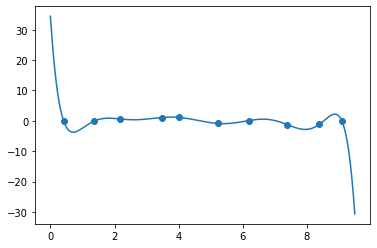

In [41]:
# part a
A = loadmat('hw01p5_nonuniform_samples.mat')
ts = [x[0] for x in A['t']]
ys = [x[0] for x in A['y']]
t = np.arange(0,9.5,0.001)

alphas = fit_polynomial(ts, ys)

plot_polynomial(alphas, t)

plt.scatter(ts, ys)

In [42]:
# part b

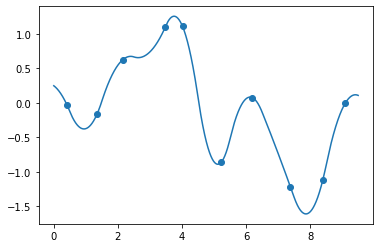

In [43]:
alpha, _ = generate_alphas(10, ts, ys)

piecepoly2(t, alpha)

plt.scatter(ts, ys)



Problem 6
---------------

#### part a ####
f'(d) = (f(c) - f(a)) / (c - a) and f'(e) = (f(b) - f(c)) / (b-c) where c = (a+b) / 2. We know that f'(d) is < f'(e) since f' is monotonicly increasing, giving us...

\[(f(c) - f(a)) / (c - a)\] <= \[(f(b) - f(c)) / (b - c)\]

Since (c-a) = (b -c) we can cancel both. This gives us...

f(c) - f(a) <= f(b) - f(c)

2f(c) <= f(b) + f(a)

f(c) <= (f(b) + f(a)) / 2

Substituting c = a+b/2 we have..

f(a+b/2) <= (f(a) + f(b)) / 2


#### part b #### 

##### Prove Additions Operators #####
For any two sequences $\{x_n\}_{1}^{\infty}$ and $\{y_n\}_{1}^{\infty}$ we define $x_n$ + $y_n$ = (x1+y1, x2+y2, ... xn+yn). 

1. x + y = y + x

Let x+y = a and let y+x = b. Since term $a_i$ is equal to terms $x_i$ + $y_i$ and since $b_i$ is equal to terms $y_i$ + $x_i$ we can say that x+y = y+x because $x_i$ + $y_i$ = $y_i$ + $x_i$ for all $i$ in \[1, -$\infty$\]

2. x + (y + z) = (x + y) + z

Again for each term in x + y + z whether you add x+y first or y+z first each term will be $x_i$ + ($y_i$ + $z_i$) or ($x_i$ + $y_i$) + $z_i$ and for individual terms of addition in R these are equivalent.

3. unique zero vector such that x + 0 = x

Let the zero vector = (0, 0, 0, ..., 0). If any term ($zero_i$) is non-zero, the vector would not be unique but it would also mean that for that term when the vector is added to x, $x_i$ would not be equal to itself breaking the condition.

4. -x exists such that x - x = 0

We can define -x as ($-1*x_1, -1*x_2, ..., -1*x_n$) and then when the two vectors are added each term will be $x_i + -1*x_i$ giving us x = 0.

##### Prove on scaler multiplication operators ######

1. a(x + y) = ax + ay

For each term of the sequence s = a(x+y) $s_i$ we have $(x_i+y_i)*a = ax_i + ay_i$ and for each term of the sequence r = ax + ay $r_i$ we have $ax_i + ay_i = a(x_i + y_i)$ so the two are equivalent.

2. (ab)x = a(bx)

For each term of the sequence s = a(bx) $s_i$ we have $a(bx_i) = abx_i$ and for each term of the sequence r = (ab)x $r_i$ we have $ab(x_i) = abx_i$ so the two are equivalent.

3. 1x = x

For each term in sequence s = 1*x we have ($1*x_1, 1*x_2, ... 1*x_n$) = ($x_1, x_2, ..., x_n$) = x.

4. 0x = 0

For each term in sequence s = 0*x we have ($0*x_1, 0*x_2, ... 0*x_n$) = ($0, 0, ..., 0$) = 0.

##### Prove closed on scaler multiplication #####
$\sum_{n=1}^{\infty}|aX_{n}|^{p} < \infty$

$|a|^{p}\sum_{n=1}^{\infty}|X_{n}|^{p} < \infty$

Since |a|^{p} is a constant and we already know by definition that $\sum_{n=1}^{\infty}|X_{n}|^{p}$ is finite
##### Prove closed on scaler mult with addition #####
We want to show that $\sum_{i=1}^{\infty}|ax_{n} + by_{n}|^{p} < \infty$. We already showed that $\sum_{i=1}^{\infty}|ax_{n}|^{p} < \infty$ so we can let $ax_{n} = x'$ and let $by_{n} = y'$ giving $\sum_{i=1}^{\infty}|x^{'}_{n} + y^{'}_{n}|^{p} < \infty$. We can multiply and divide by 2 to get $\sum_{i=1}^{\infty}|(2x^{'}_{n} + 2y^{'}_{n})/2|^{p} < \infty$ and further substitute $2x'_{n} = a$ and $2y'_{n} = b$ giving $\sum_{i=1}^{\infty}|(a + b)/2|^{p} < \infty$. We already know from 6a that f((a+b)/2) <= (f(a) + f(b)) / 2 and we also know by definition that f(a) is finite and f(b) is finite so f(a) + f(b) must also be finite. From there we can say that since f((a+b)/2) is less than or equal to (f(a) + f(b)) / 2, f((a+b)/2) must also be finite and therefore a member of $l_p$.
